In [1]:
import numpy as np
import random
import os, subprocess
import matplotlib.pyplot as plt

In [17]:
 class PLA_LR:
    def __init__(self, N):
        # Random linearly separated data
        xA,yA,xB,yB = [random.uniform(-5, 5) for i in range(4)]
        self.V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
        self.X = self.generate_points(N)
 
    def generate_points(self, N):
        X = []
        X1= [] #for regression
        Y1= [] #for regression
        for i in range(N):
            x1,x2 = [random.uniform(-5, 5) for i in range(2)]
            x = np.array([1,x1,x2])
            s = int(np.sign(self.V.T.dot(x)))
            X.append((x, s))
            X1.append(x)
            Y1.append(s)
        self.X1=X1
        self.Y1=Y1
        return X
 
    def plot(self, vec=None):
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        V = self.V
        a, b = -V[1]/V[2], -V[0]/V[2]
        l = np.linspace(-5,5)
        plt.plot(l, a*l+b, 'k-')
        cols = {1: 'g', -1: 'r'}
        for x,s in self.X:
            plt.plot(x[1], x[2], cols[s]+'s')     
        if vec != None:
            aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
            plt.plot(l, aa*l+bb, 'b-', lw=2)
          
        plt.show()
 
    def classification_error(self, vec):
        # Error defined as fraction of misclassified points
        pts = self.X
        M = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error
 
    def choose_miscl_point(self, vec):
        # Choose a random point among the misclassified
        pts = self.X
        mispts = []
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0,len(mispts))]
 
    def pla(self):
        # Initialize the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterate until all points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Pick random misclassified point
            x, s = self.choose_miscl_point(w)
            # Update weights
            w += s*x
            self.plot(vec=w)
            plt.title('N = %s, Iteration %s\n' \
                          % (str(N),str(it)))
            plt.savefig('p_N%s_it%s' % (str(N),str(it)))
            plt.show()
                
        self.w = w
   
    def lin_reg(self):
        # function to call linear regression   
        w = np.array([0,0,0])
        N=len(self.X)
        # take the pseudo inverse
        B = np.linalg.pinv(self.X1) 
        #ddot product of B and Y 
        w = B.dot(self.Y1)
        self.plot(vec=w)
        plt.title('N = %s, Linear Regression\n' \
                          % (str(N)))
        plt.savefig('p_N%s_LR' % (str(N)))
        plt.show()
        self.w=w


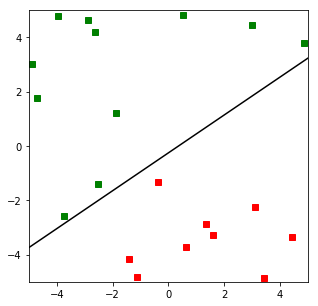

In [18]:
p = PLA_LR(20)
p.plot()     #plot target function shown by black line and random points which are classified into +1(blue) and -1(red)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


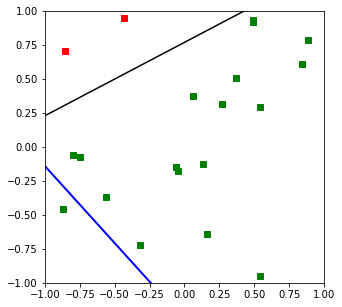

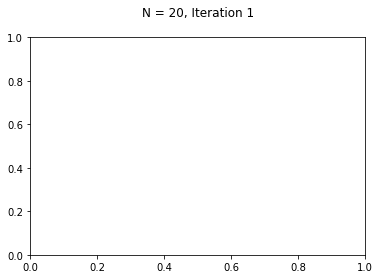

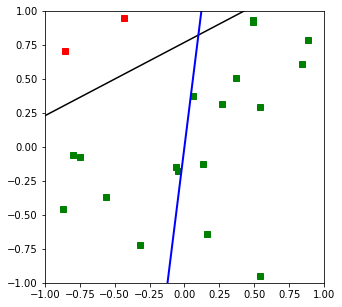

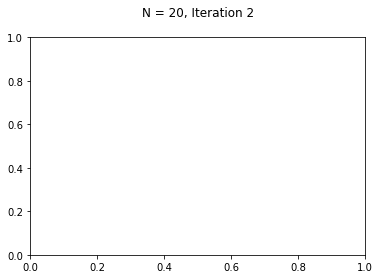

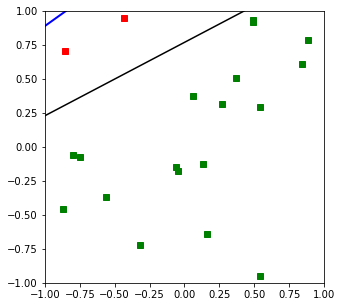

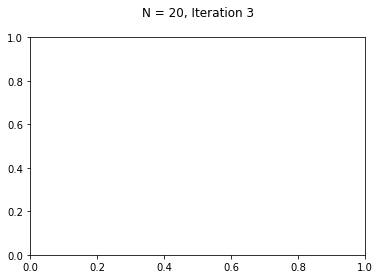

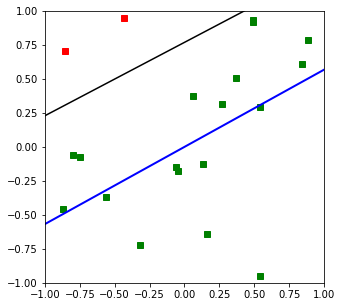

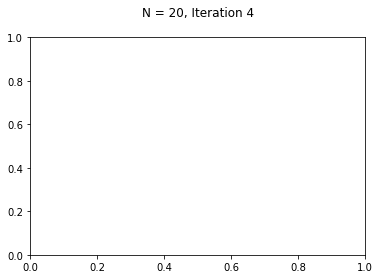

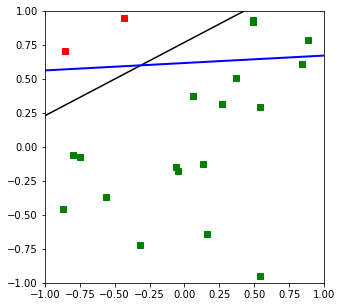

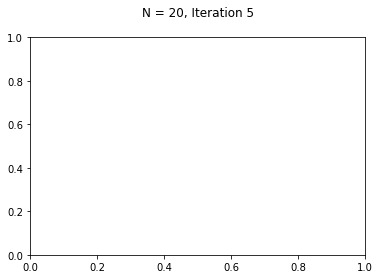

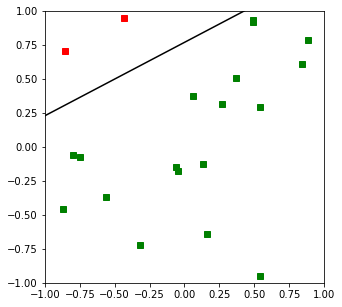

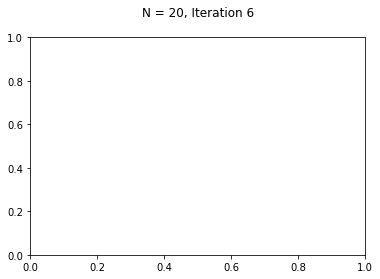

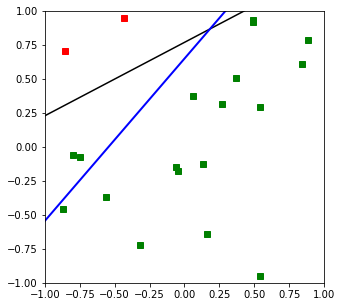

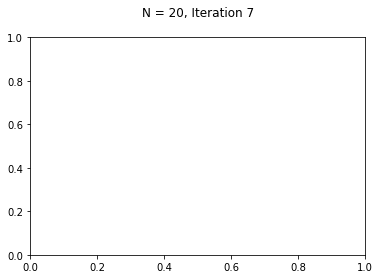

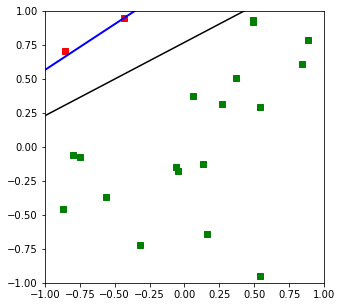

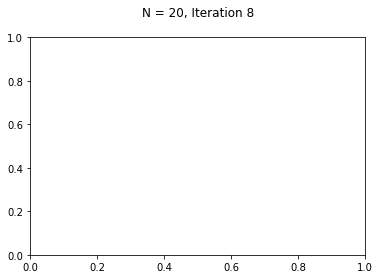

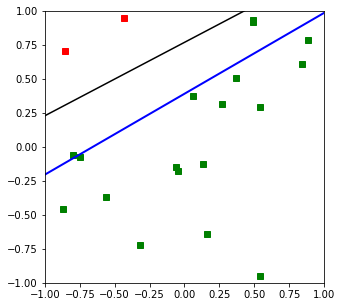

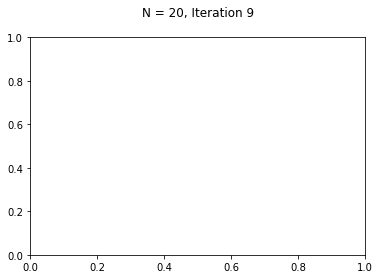

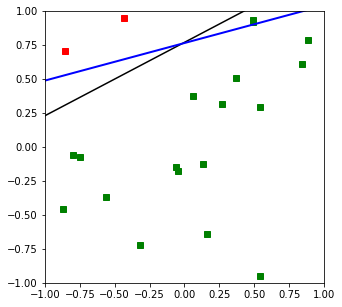

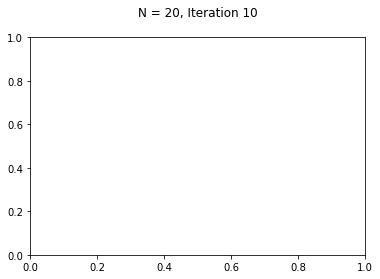

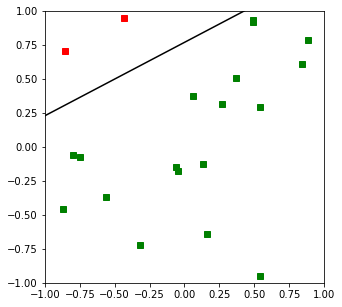

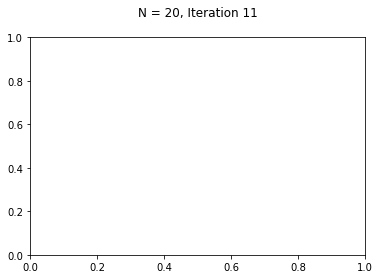

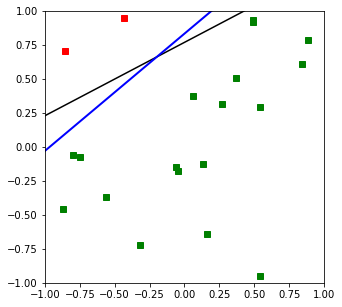

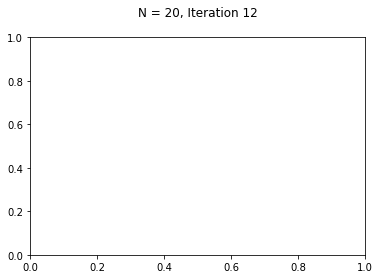

In [11]:
p.pla() #calling perceptron model (green line is hypothesis and black is target function)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


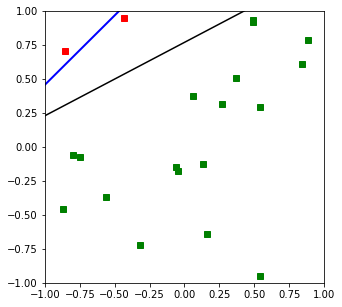

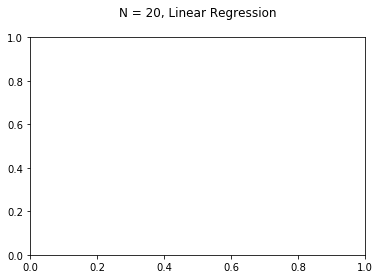

In [12]:
p.lin_reg() #calling linear regression model (green line is hypothesis and black is target)